# Непараметрические тесты

В предыдущем юните мы рассмотрели параметрические методы для нормально распределённых данных, а в этом поговорим о непараметрических. Такие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.

Особенность непараметрических методов в том, что они сравнивают не сами значения признаков, а их ранги или частоты.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).

Все функции, которые реализуют непараметрические тесты в Python-библиотеках:

* берут на вход:
* * выборки или их параметры;
* * параметры проверяемой гипотезы;
* отдают на выход:
* * уровень значимости p (p-value);
* * дополнительные параметры.

В примерах этого юнита мы не проверяем данные на нормальность. Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. Если данные распределены нормально, лучше выбрать параметрические тесты.

**ГИПОТЕЗЫ ДЛЯ ОДНОВЫБОРОЧНЫХ ТЕСТОВ**

Как сформулировать нулевую и альтернативную гипотезы для теста, если у нас всего одна выборка?

В этом случае имеющаяся выборка (точнее, её статистика, вычисляемая тестом) будет сравниваться со значением, заданным в параметрах теста:

Нулевая гипотеза — соответствие (равенство) выборки и заданного значения.
Альтернативная гипотеза — их отличие.


## КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)

``Критерий знаков (для одной группы) используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог одновыборочного t-критерия.``

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

Основные входные параметры:

* samp — выборочные данные;
* mu0 — ожидаемое значение медианы признака.

**Пример задачи, когда может понадобиться использование теста:**

Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

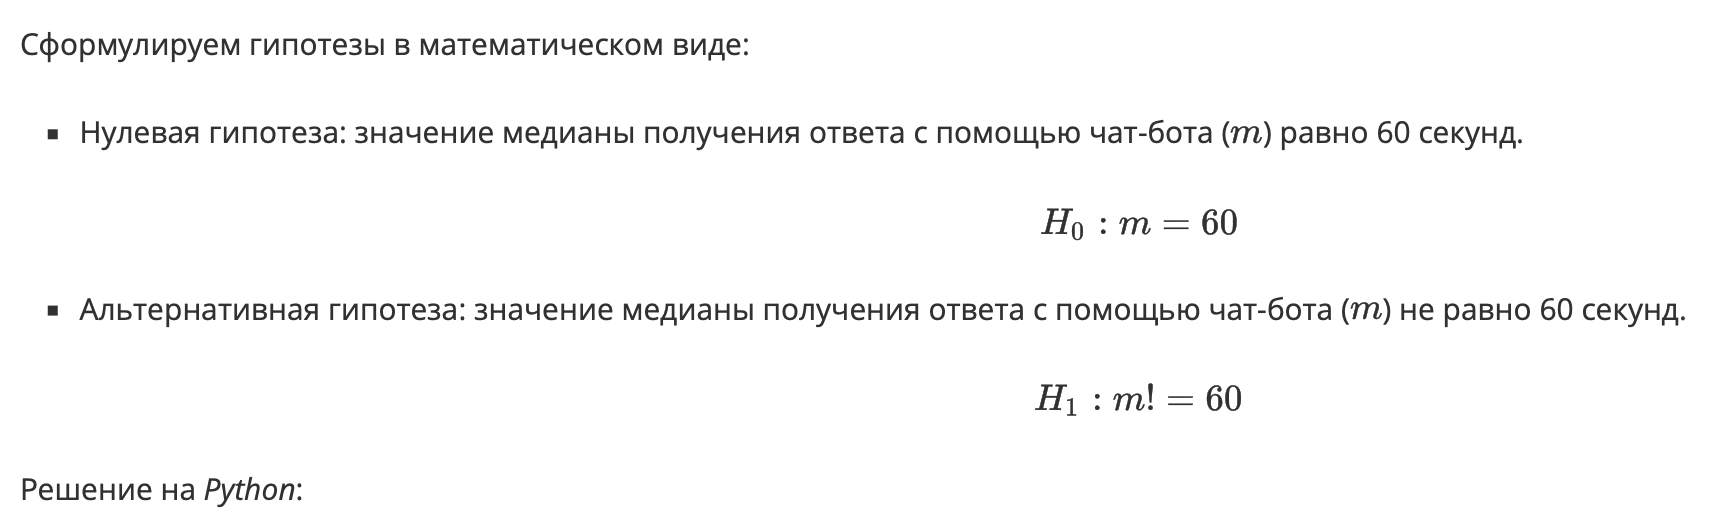

In [11]:
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    
    
# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000


p-value = 0.016
Распределение не нормальное
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## U-КРИТЕРИЙ МАННА — УИТНИ

U-критерий Манна — Уитни используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции mannwhitneyu модуля stats библиотеки scipy.

Основные входные параметры:

* ``x``, ``y`` — выборочные данные двух групп;
* ``alternative`` — вид альтернативной гипотезы:
* ``‘two-sided’`` (двусторонняя, используется по умолчанию);
* ``‘less’`` (левосторонняя);
* ``‘greater’`` (правосторонняя).

Метод основан на следующей процедуре:

1. Две выборки объединяют и упорядочивают в порядке возрастания признака.
2. Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.

Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.
Примеры задач, когда может понадобиться использование теста:

* Требуется сравнить распределение зарплат выпускников университета А с зарплатой пяти выпускников университета Б (распределение зарплаты, как правило, не является нормальным).
* Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету А, и для людей, использующих диету Б (потеря веса, как правило, не распределяется нормально).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):

* Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
* Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

Сформулируем гипотезы:

* Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
* Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.
Решение на Python:


In [12]:
# задаём уровень значимости
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.016
Распределение не нормальное
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## КРИТЕРИЙ УИЛКОКСОНА

``Критерий Уилкоксона используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог парного t-критерия.``

Критерий Уилкоксона реализован в функции wilcoxon модуля stats библиотеки scipy.

Основные входные параметры:

* x, y — выборочные данные двух групп;
* alternative — вид альтернативной гипотезы:
* ‘two-sided’ (двусторонняя, используется по умолчанию);
* ‘less’ (левосторонняя);
* ‘greater’ (правосторонняя).

Этот тест аналогичен критерию знаков (для одной группы).

Примеры задач, когда может понадобиться использование теста:

Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):

* Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
* Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
Альтернативная гипотеза: распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.
Решение на Python:

In [13]:
# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

``Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.``

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

**Основные входные параметры:**

* sample1, sample2, … — выборочные данные групп.

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
* Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):

* Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
* Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
* Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

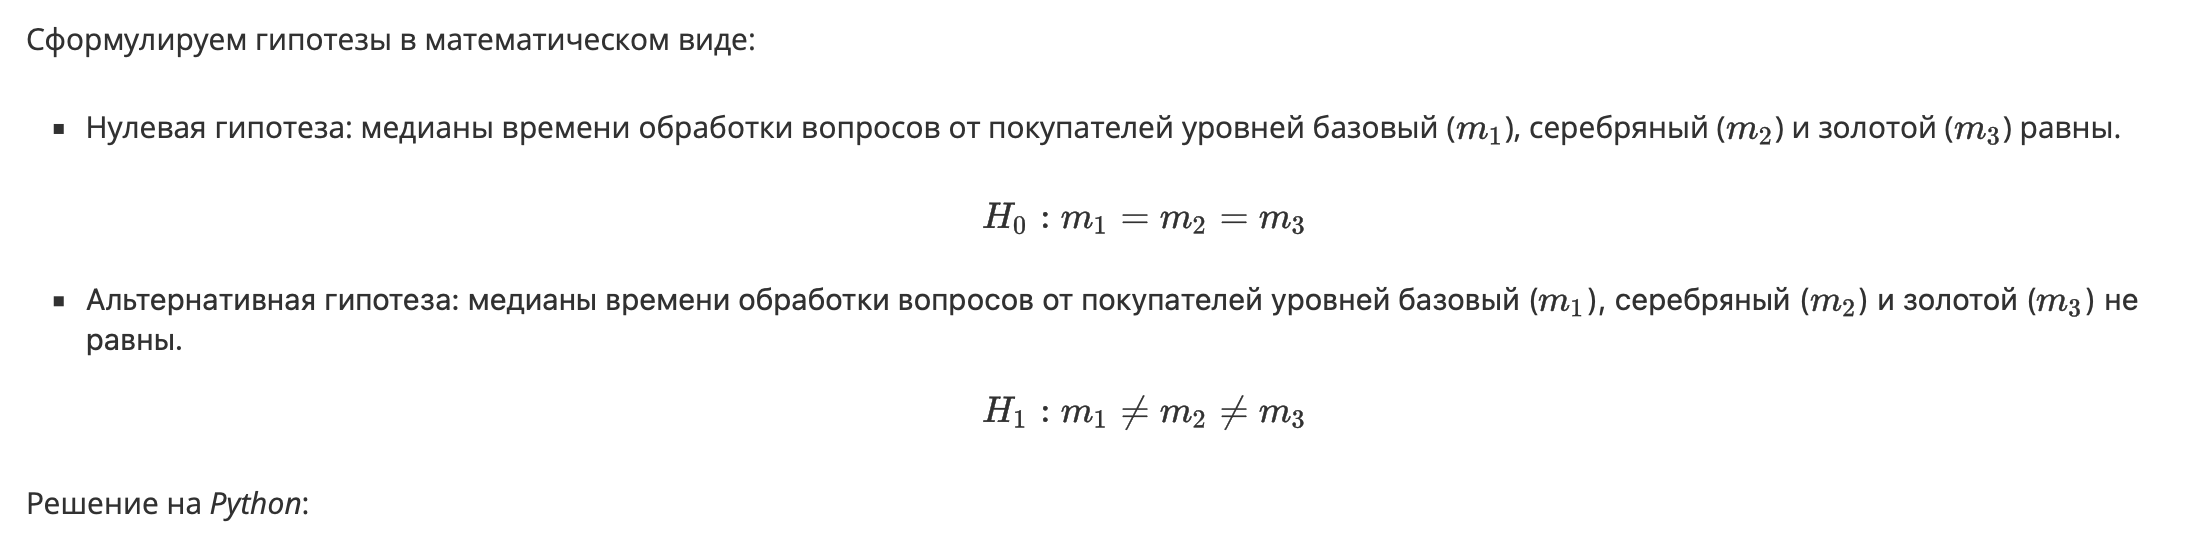

In [14]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## КРИТЕРИЙ ФРИДМАНА

``Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог парного ANOVA с повторными измерениями.``

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

**Основные входные параметры:**

sample1, sample2, … — выборочные данные групп.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

* «Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
* «Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
* «Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.
Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

Сформулируем гипотезы:

* Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
* Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.
Решение на Python:

In [15]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


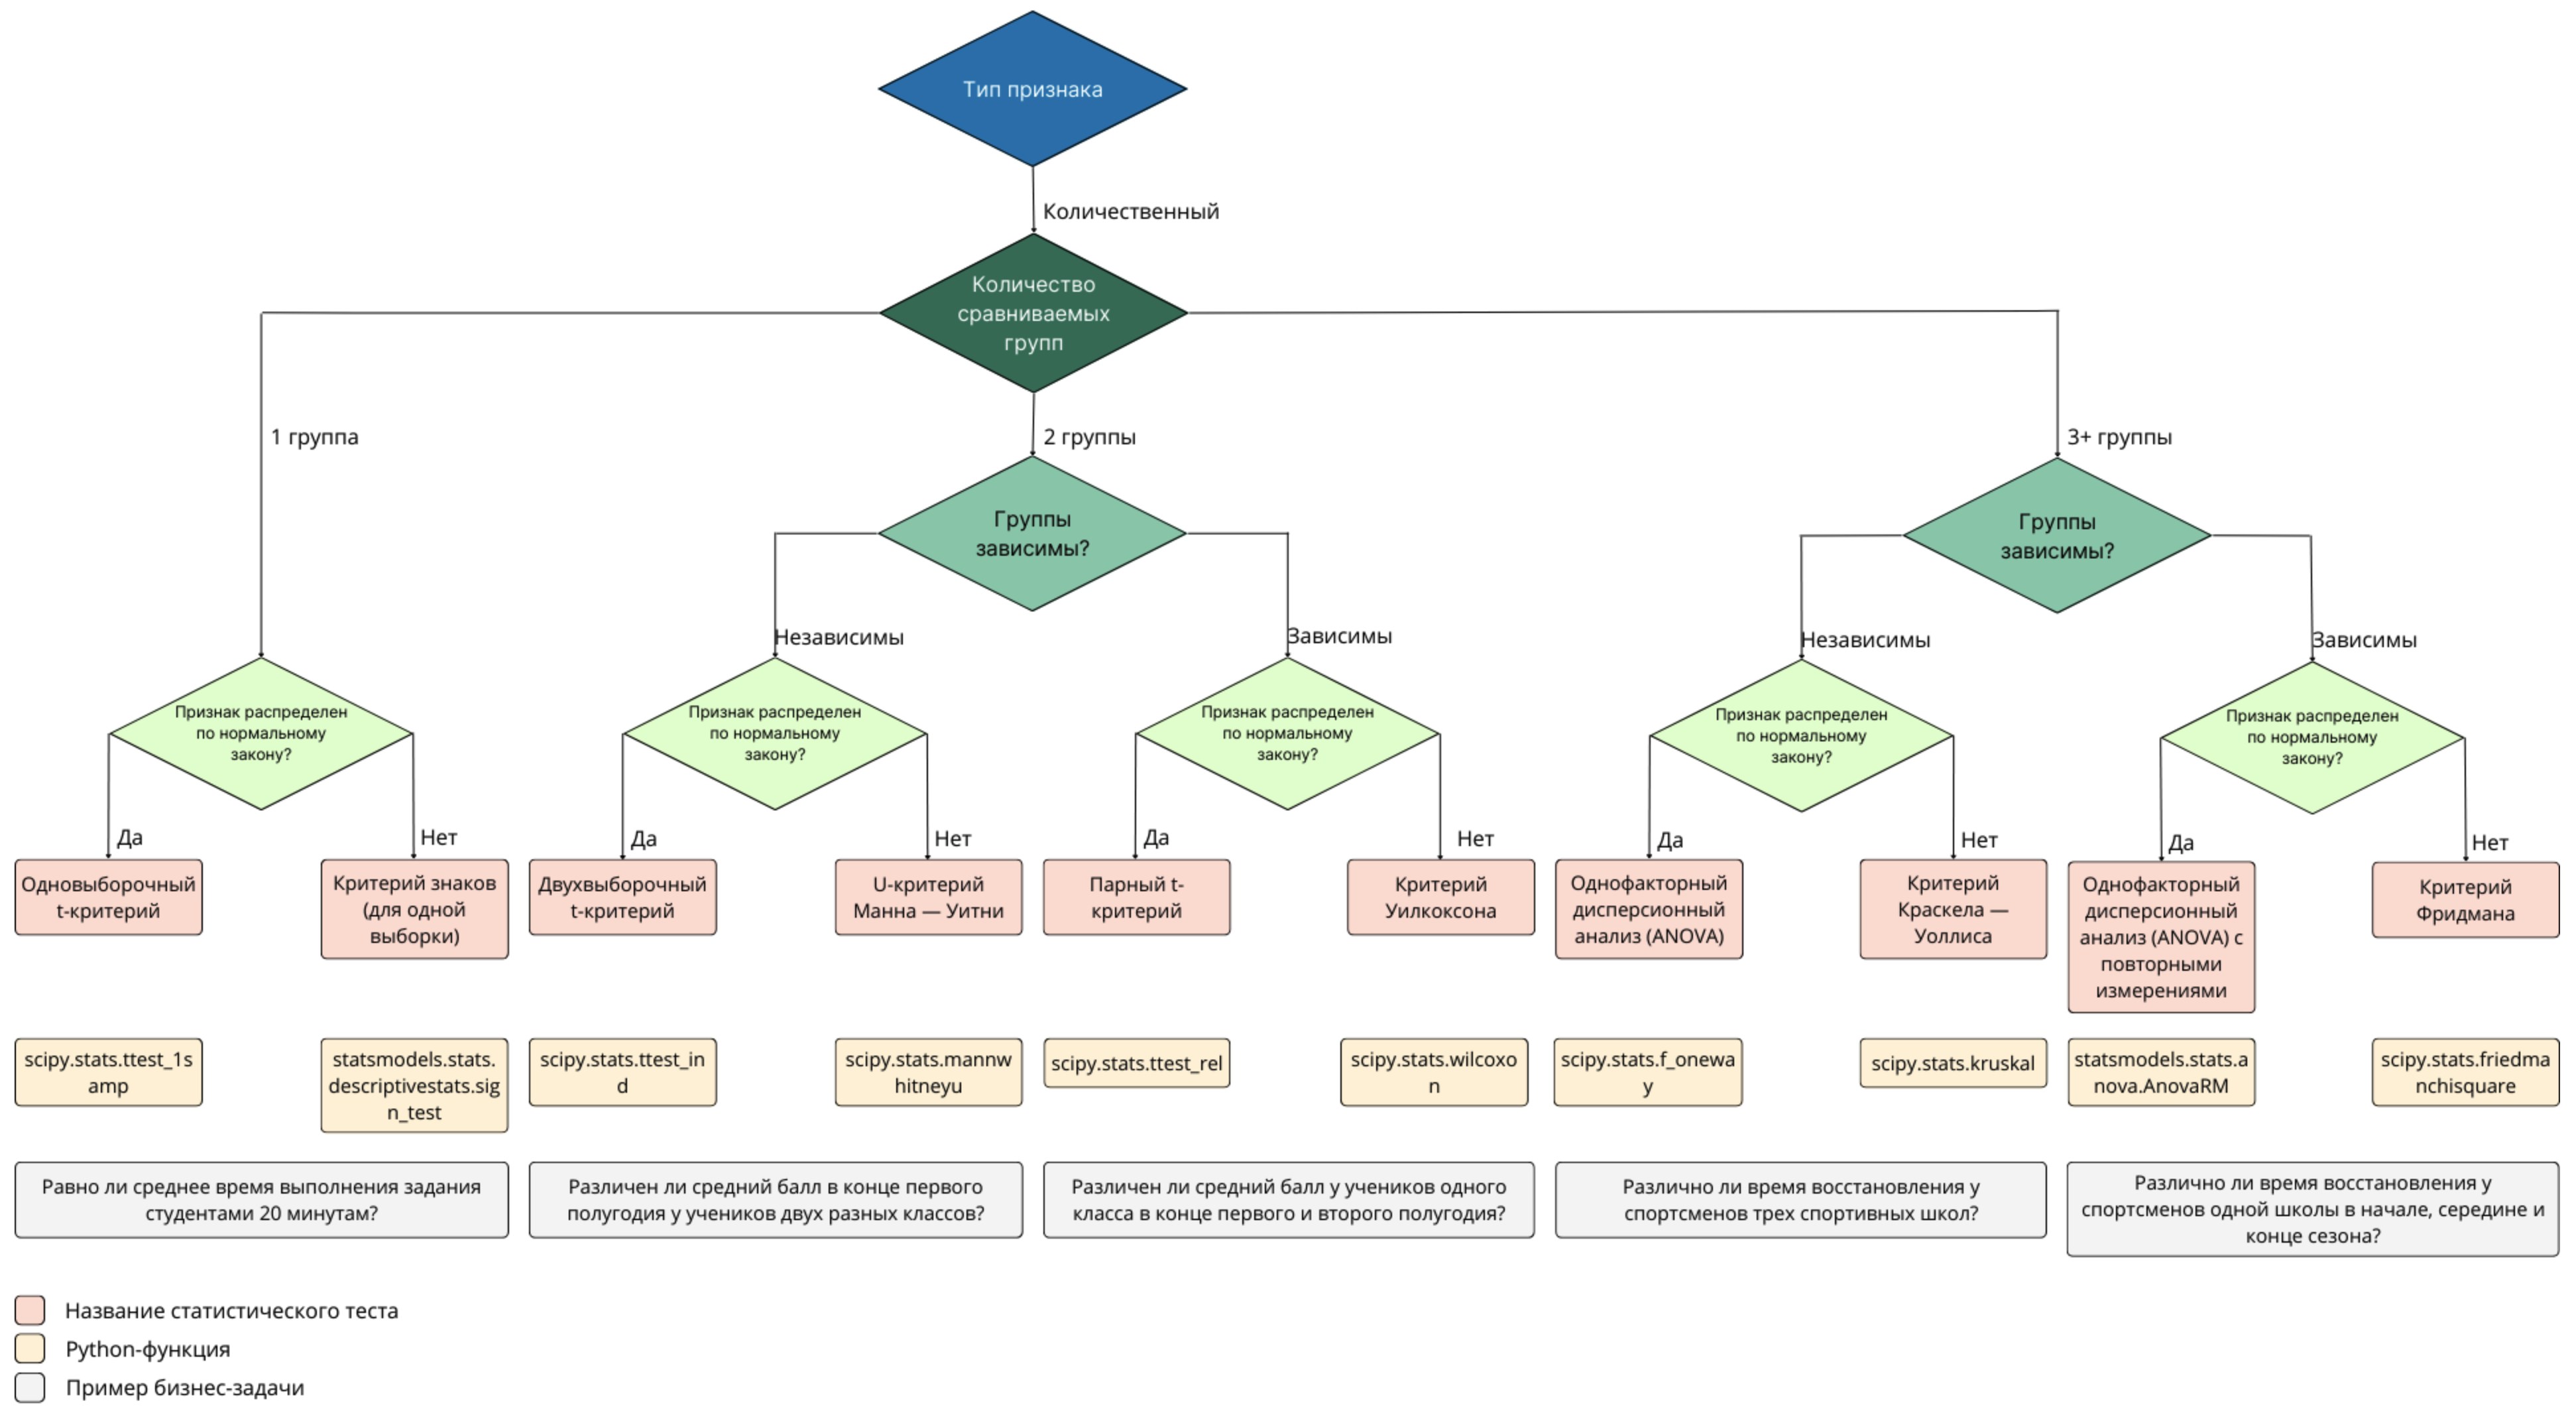


### Задание 8.3

In [16]:
# загружаем данные
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

# проводим тест
_, p = stats.wilcoxon(data_before, data_after, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### Задание 8.4

In [18]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    
    
# проводим тест
_, p = sign_test(data, 75)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.005
Распределение не нормальное
p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### Задание 8.5

In [19]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

# проводим тест
_, p = stats.kruskal(data_tariffs, data_offers, data_support)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
